# COMPUTING MOLECULAR DESCRIPTORS

In [3]:
import pandas as pd
import numpy as np
df= pd.read_csv('dataset.csv')
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,991,3423840.0,CNC1=C(N=CC=C1)C=NNC(=S)N,30.0,0
1,2104,3157186.0,CCCC1=C(C2=NC3=CC=CC=C3N2C(=C1)NCCOCCO)C#N,0.0,0
2,838,15945344.0,CCN(CC)C1=CC(=[N+]2CCCC2)CC(C1)(C)C.[I-],45.0,1
3,630,6603246.0,CCCCN1C2=C(CCC2)C(=N)C3=C1CCC3.I,61.0,1
4,1579,2963165.0,CC1=CC=C(C=C1)N2CC(CC2=O)C(=O)NC3=NC4=C(S3)C=C...,0.0,0
...,...,...,...,...,...
2099,946,16746116.0,CC[C@H](CO)NC1=NC(=C2C(=N1)N(C=N2)C(C)C)NC3=CC...,36.0,1
2100,632,1150803.0,CC(C)(C)C1=CC=C(C=C1)C(=O)NC2=CC=C(C=C2)C(=O)N...,61.0,1
2101,2137,984185.0,C1COC2=C(O1)C=CC(=C2)C(=O)CSC3=NC4=C(C=NN4)C(=...,0.0,0
2102,1743,3220816.0,CN(C)C1=CC=C(C=C1)NC(=O)CN2CCC(CC2)NC(=O)C3CCCCC3,0.0,0


In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [5]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [6]:
#function to calculate Morgan fps
def morgan_fps(data):
  fps = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in data]  # Calculate Morgan fingerprints for each molecule
  fp_array = [np.array(fp) for fp in fps]   # Convert fingerprints to numpy array
  column_names = ["morgan_" + str(i) for i in range(len(fp_array[0]))]
  return pd.DataFrame(fp_array, columns = column_names)


# DATA PROCESSING AND SPLITTING

In [7]:
d1 = morgan_fps(mols)
X = pd.concat([d1], axis = 1)
X

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2102,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = df["Activity_outcome"]
y

0       0
1       0
2       1
3       1
4       0
       ..
2099    1
2100    1
2101    0
2102    0
2103    0
Name: Activity_outcome, Length: 2104, dtype: int64

In [9]:
from sklearn.feature_selection import VarianceThreshold

# Define variance threshold
# Here, we use a threshold of 0 which would remove all features with zero variance
sel = VarianceThreshold(threshold=0)

# Fit and transform the data
sel.fit(X)

mask = sel.get_support()
X = X[X.columns[mask]]


In [10]:
X

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2102,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [12]:
X_train

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1454,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1703,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train

2016    1
2007    1
1454    0
1703    1
142     1
       ..
2065    1
221     1
943     0
630     1
1739    1
Name: Activity_outcome, Length: 1472, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE

# assuming X_train and y_train are your training features and labels

smote = SMOTE(sampling_strategy='minority',random_state=2)

X_sm, y_sm = smote.fit_resample(X_train, y_train)

# Now you can train your model using the balanced data:
# model.fit(X_sm, y_sm)

# APPLICABILITY DOMAIN

In [11]:
import numpy as np
from sklearn import datasets
from scipy.spatial import distance

In [12]:
def in_applicability_domain(X, X_sm, threshold):
    # Calculate the distance from each point in X to its nearest neighbor in X_train
    dist = distance.cdist(X, X_sm, 'euclidean')
    min_dist = np.min(dist, axis=1)
    
    # A point is in the applicability domain if its distance to the nearest neighbor is less than the threshold
    return min_dist < threshold

In [13]:
# Calculate the applicability domain with a threshold of 1.0
app_domain = in_applicability_domain(X_test, X_sm, threshold=5.0)

print('Applicability domain:', app_domain)


Applicability domain: [ True False  True  True  True False  True False False  True False  True
 False False  True False  True False False False False False  True  True
  True  True False False  True  True  True  True False  True False False
 False False  True False False False  True  True  True False False  True
 False  True False False  True False False  True False  True  True  True
  True  True False  True  True  True False False  True  True False  True
 False  True False  True False False False False False False  True  True
 False  True  True  True  True  True False False False  True  True  True
 False  True  True False  True  True  True False  True False  True  True
 False False False  True  True  True  True False False  True  True False
  True False  True  True False False False False  True  True  True  True
 False False  True False False False  True False  True False False False
 False False  True  True False False  True  True False  True False False
 False False False False Fals

In [14]:
# Assuming you have your applicability domain computed as app_domain

# Find inliers which are inside the applicability domain
inliers = app_domain

# Apply the mask to the test dataset
X_test_inliers = X_test[inliers]
X_test_inliers

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1037,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_test_inliers = y_test[inliers]
y_test = y_test_inliers

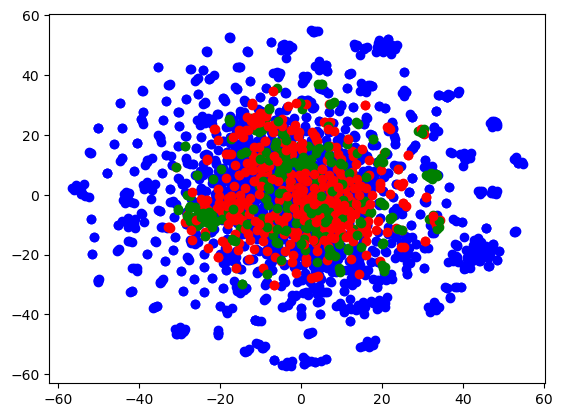

In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a t-SNE object
tsne = TSNE(n_components=2)

# Fit and transform X_train to 2D
X_sm_2D = tsne.fit_transform(X_sm)

# Transform X_test to 2D using the same t-SNE transformation
X_test_2D = tsne.fit_transform(X_test)

# Calculate applicability domain
app_domain = in_applicability_domain(X_test, X_sm, threshold=5.0)

# Plot the training data in blue
plt.scatter(X_sm_2D[:, 0], X_sm_2D[:, 1], color='blue')

# Plot the test data in red or green depending on whether they are in or out of the applicability domain
for i in range(len(X_test_2D)):
    if app_domain[i]:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='green')
    else:
        plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color='red')

plt.show()


# BUILDING RANDOM FOREST MODEL

In [17]:
#RANDOM FOREST (MODEL 1)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features = 5 , n_estimators = 185, random_state=2)
rfc.fit(X_sm, y_sm)
#rfc.fit(X_train, y_train)

# Make predictions on the testing set
preds = rfc.predict(X_test_inliers)
proba = rfc.predict_proba(X_test_inliers)
#y_pred = rfc.predict(X_test)

In [18]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC


print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.9349593495934959, specificity: 0.8903225806451613, precision: 0.8712121212121212, f1: 0.9019607843137255 
mcc: 0.8208377996638218, accuracy: 0.9100719424460432, roc_auc: 0.94982953055337 
balanced_accuracy: 0.9126409651193286


# TUNING OF HYPERPARAMETERS

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter values that should be searched
n_estimators_range = list(range(100, 1100, 100)) # Let's try from 100 to 200 (exclusive) with step 5
max_features_range = list(range(1, 10)) # Let's try from 1 to 10 (exclusive)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=n_estimators_range, max_features=max_features_range)

# Instantiate the grid
rfc = RandomForestClassifier(random_state=2)
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# Fit the grid with data
grid.fit(X_sm, y_sm)

# View the best parameters
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()


Best parameters set found on development set:

{'max_features': 1, 'n_estimators': 400}



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define and train the model
rfc = RandomForestClassifier(max_features = 1 , n_estimators = 700, random_state=5)

rfc.fit(X_sm, y_sm)
#rfc.fit(X_train, y_train)

# Make predictions on the testing set
preds = rfc.predict(X_test_inliers)
proba = rfc.predict_proba(X_test_inliers)
#y_pred = rfc.predict(X_test)

In [20]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel() 
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
roc_auc = roc_auc_score(y_test, proba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.943089430894309, specificity: 0.8903225806451613, precision: 0.8721804511278195, f1: 0.90625 
mcc: 0.8286446650308805, accuracy: 0.9136690647482014, roc_auc: 0.9574613165486494 
balanced_accuracy: 0.9167060057697352


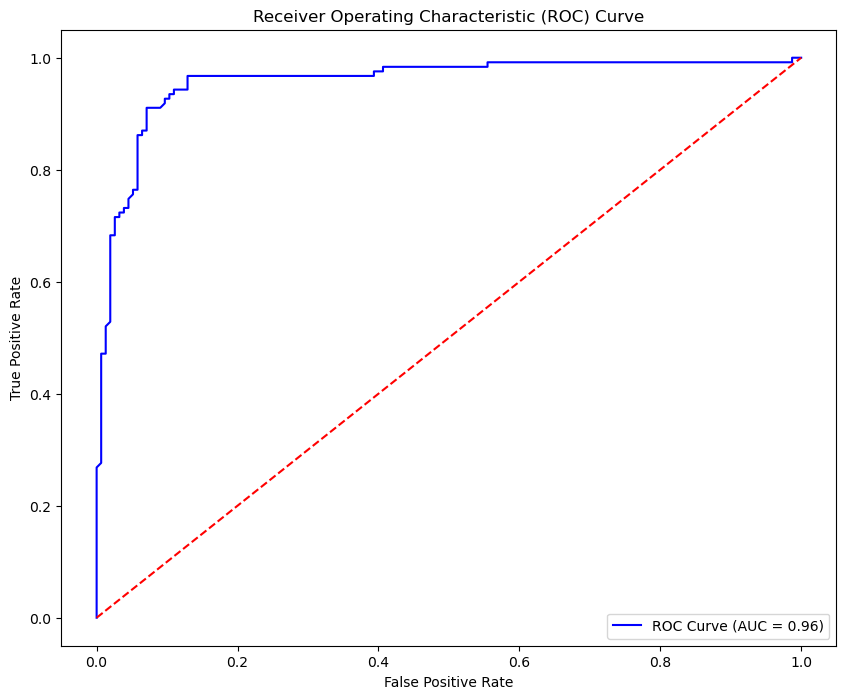

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line, represents random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()


In [22]:
import joblib

In [23]:
joblib.dump(rfc, "rfc_morgan.pkl")

['rfc_morgan.pkl']

# MODEL VALIDATION

In [24]:
import pandas as pd
import numpy as np
dp= pd.read_csv('validation_dataset.csv')
dp

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,486,46903215.0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,71.0,1
1,1700,24980419.0,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0.0,0
2,1309,7567657.0,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,7.0,0
3,1516,2560914.0,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,1.0,0
4,1090,352429.0,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,20.0,0
...,...,...,...,...,...
229,1911,9636483.0,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0.0,0
230,309,16681822.0,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],82.0,1
231,2253,7524261.0,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0.0,0
232,2243,2867068.0,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0


In [25]:
valdata = dp.copy()
colname = ["Canonical_smiles", "Activity_outcome"]
valdata = valdata[colname]

valdata.drop_duplicates(inplace = True, ignore_index = True)
valdata.reset_index(inplace = True, drop = True)
valdata

,Canonical_smiles,Activity_outcome
0,CC1=CC=C(C=C1)S(=O)(=O)N(CC#C)C[C@@H]2[C@H]([C...,1
1,C1CC1N(CC2=NN=C(O2)C3=CC=C(C=C3)Cl)C(=O)C4=CC(...,0
2,CC1CCC2(CC1)C(=O)N(C(=O)N2)CC(=O)N3CCC4=CC(=C(...,0
3,CC1=C(C=CC(=C1)Cl)NC(=O)CN2C(=O)C(=O)N(C2=O)C3...,0
4,CC(=O)ON=C1C=CC(=C(C#N)C2=CC=CC=C2)C=C1,0
...,...,...
229,C1=CC=C2C(=C1)C(=NC(=N2)C3=CC=CC=C3Cl)N/N=C/C4...,0
230,CCCCCC1=CC(=C(C=C1)OCCC[N+]2=CC=CC=C2)CCCCC.[Cl-],1
231,CCS(=O)(=O)NC1=CC=CC(=C1)C2=NN3C(=NN=C3C4=CN=C...,0
232,CC1=CC2=C(C3=C(CCCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0


In [26]:
smi_list = valdata["Canonical_smiles"].to_list()
molsv = [Chem.MolFromSmiles(smi) for smi in smi_list]

X_val = morgan_fps(molsv)
X_val = X_val[X_val.columns[mask]]
X_val

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y_val = valdata["Activity_outcome"]
y_val

0      1
1      0
2      0
3      0
4      0
      ..
229    0
230    1
231    0
232    0
233    1
Name: Activity_outcome, Length: 234, dtype: int64

In [28]:
y_valpred = rfc.predict(X_val)
#y_valproba = svm.predict_proba(X_val)

In [29]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_val, y_valpred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
#mcc = matthews_corrcoef(y_val, y_valproba)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
#roc_auc = roc_auc_score(y_val, y_valproba[:, 1]) # calculate ROC AUC

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, roc_auc: {roc_auc} \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.8235294117647058, specificity: 0.803030303030303, precision: 0.7636363636363637, f1: 0.7924528301886793 
mcc: 0.8286446650308805, accuracy: 0.811965811965812, roc_auc: 0.9574613165486494 
balanced_accuracy: 0.8132798573975044


In [30]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.spatial import distance
import numpy as np

rfc_pipeline = Pipeline([
    ("Variance_threshold", VarianceThreshold(threshold=0)),
    ("Smote", SMOTE(sampling_strategy='minority', random_state=2)),
    ("model", RandomForestClassifier(max_features=1, n_estimators=150, random_state=5))
])


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [32]:
rfc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('Variance_threshold', VarianceThreshold(threshold=0)),
                ('Smote', SMOTE(random_state=2, sampling_strategy='minority')),
                ('model',
                 RandomForestClassifier(max_features=1, n_estimators=150,
                                        random_state=5))])

In [33]:
preds = rfc_pipeline.predict(X_test)

In [34]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tn + tp) / (tn+tp+fn+fp)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = matthews_corrcoef(y_test, preds)
precision = tp / (tp + fp)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"sensitivity: {sensitivity}, specificity: {specificity}, precision: {precision}, f1: {f1} \nmcc: {mcc}, accuracy: {accuracy}, \nbalanced_accuracy: {balanced_accuracy}")


sensitivity: 0.7451737451737451, specificity: 0.8284182305630027, precision: 0.7509727626459144, f1: 0.7480620155038759 
mcc: 0.5742819542009711, accuracy: 0.7943037974683544, 
balanced_accuracy: 0.7867959878683739


In [35]:
import pickle
with open('rfc_pipeline_new.pkl', 'wb') as file:
    # Use pickle to dump the pipeline into the file
    pickle.dump(rfc_pipeline, file)

In [36]:
with open('rfc_pipeline_new.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

In [37]:
loaded_pipeline.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [38]:
loaded_pipeline.predict_proba(X_test)

array([[0.54      , 0.46      ],
       [0.46      , 0.54      ],
       [0.51333333, 0.48666667],
       ...,
       [0.48666667, 0.51333333],
       [0.81333333, 0.18666667],
       [0.26666667, 0.73333333]])

In [39]:
import sys
import pickle

print("Python version:", sys.version)
print("Pickle version:", pickle.format_version)


Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Pickle version: 4.0
